In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
url = "/content/drive/MyDrive/Dulieutest/doanKHDL/weather.csv"

In [6]:
df = pd.read_csv(url , sep = ';')
df.head()

,Date,Time,Weather,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Vis,Wind Speed,Wind Direction
0,"Thu 01, Jan 2009",12:00:00 SA,Mist,230,250,150,0,97,10,10100,Poor,90,NNW
1,"Thu 01, Jan 2009",3:00:00 SA,Rain,220,250,130,4,97,84,10100,Poor,90,NNW
2,"Thu 01, Jan 2009",6:00:00 SA,Mist,220,250,80,0,98,10,10110,Poor,60,N
3,"Thu 01, Jan 2009",9:00:00 SA,Cloudy,270,310,70,1,83,64,10110,Excellent,60,NNE
4,"Thu 01, Jan 2009",12:00:00 CH,Cloudy,280,340,30,0,76,62,10100,Excellent,30,NE


In [7]:
df.shape

(34976, 13)

In [8]:
df.isnull().sum()

Date              0
Time              0
Weather           0
Temp              0
Feels             0
Gust              0
Rain              0
Humidity          0
Cloud             0
Pressure          0
Vis               0
Wind Speed        0
Wind Direction    0
dtype: int64

In [9]:
df["Temp"] = df['Temp']/10
df["Feels"] =df["Feels"]/10

In [10]:
df.head()

,Date,Time,Weather,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Vis,Wind Speed,Wind Direction
0,"Thu 01, Jan 2009",12:00:00 SA,Mist,23.0,25.0,150,0,97,10,10100,Poor,90,NNW
1,"Thu 01, Jan 2009",3:00:00 SA,Rain,22.0,25.0,130,4,97,84,10100,Poor,90,NNW
2,"Thu 01, Jan 2009",6:00:00 SA,Mist,22.0,25.0,80,0,98,10,10110,Poor,60,N
3,"Thu 01, Jan 2009",9:00:00 SA,Cloudy,27.0,31.0,70,1,83,64,10110,Excellent,60,NNE
4,"Thu 01, Jan 2009",12:00:00 CH,Cloudy,28.0,34.0,30,0,76,62,10100,Excellent,30,NE


In [11]:
df[["Date","Time"]]

,Date,Time
0,"Thu 01, Jan 2009",12:00:00 SA
1,"Thu 01, Jan 2009",3:00:00 SA
2,"Thu 01, Jan 2009",6:00:00 SA
3,"Thu 01, Jan 2009",9:00:00 SA
4,"Thu 01, Jan 2009",12:00:00 CH
...,...,...
34971,"Sun 20, Dec 2020",9:00:00 SA
34972,"Sun 20, Dec 2020",12:00:00 CH
34973,"Sun 20, Dec 2020",3:00:00 CH
34974,"Sun 20, Dec 2020",6:00:00 CH


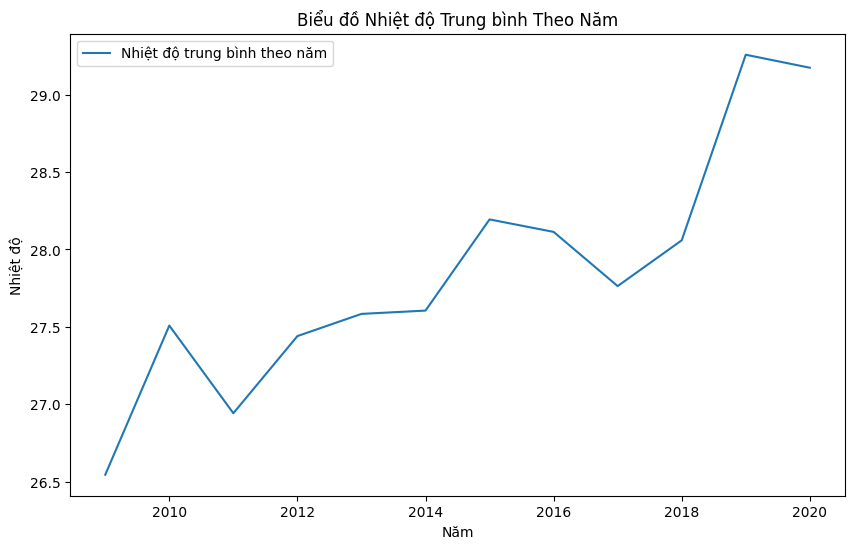

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




df['Date'] = pd.to_datetime(df['Date'])

# Tạo một cột mới trong DataFrame là năm
df['Year'] = df['Date'].dt.year

# Gom nhóm dữ liệu theo năm và tính trung bình nhiệt độ của mỗi năm
average_temp_by_year = df.groupby('Year')['Temp'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(average_temp_by_year.index, average_temp_by_year.values, label='Nhiệt độ trung bình theo năm')
plt.title('Biểu đồ Nhiệt độ Trung bình Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()


In [13]:
df

,Date,Time,Weather,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Vis,Wind Speed,Wind Direction,Year
0,2009-01-01,12:00:00 SA,Mist,23.0,25.0,150,0,97,10,10100,Poor,90,NNW,2009
1,2009-01-01,3:00:00 SA,Rain,22.0,25.0,130,4,97,84,10100,Poor,90,NNW,2009
2,2009-01-01,6:00:00 SA,Mist,22.0,25.0,80,0,98,10,10110,Poor,60,N,2009
3,2009-01-01,9:00:00 SA,Cloudy,27.0,31.0,70,1,83,64,10110,Excellent,60,NNE,2009
4,2009-01-01,12:00:00 CH,Cloudy,28.0,34.0,30,0,76,62,10100,Excellent,30,NE,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2020-12-20,9:00:00 SA,Cloudy,26.0,28.0,220,0,64,14,10120,Excellent,170,NNE,2020
34972,2020-12-20,12:00:00 CH,Cloudy,30.0,31.0,190,0,54,13,10100,Excellent,170,NNE,2020
34973,2020-12-20,3:00:00 CH,Cloudy,31.0,33.0,180,0,55,12,10080,Excellent,140,WSW,2020
34974,2020-12-20,6:00:00 CH,Cloudy,28.0,30.0,240,0,6,18,10090,Excellent,150,SE,2020


In [14]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

for feature in df.columns:
    if feature != 'Time' and feature != 'Date':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

df.drop(columns=['Date', 'Weather', 'Feels', 'Gust',  'Humidity', 'Cloud', 'Pressure', 'Wind Speed', 'Wind Direction', 'Vis'], inplace=True)
df = df[3:]
df.reset_index(drop=True, inplace=True)

df.head()

,Time,Temp,Rain,Year,Weather_1,Weather_2,Weather_3,Temp_1,Temp_2,Temp_3,...,Vis_3,Wind Speed_1,Wind Speed_2,Wind Speed_3,Wind Direction_1,Wind Direction_2,Wind Direction_3,Year_1,Year_2,Year_3
0,9:00:00 SA,27.0,1,2009,Mist,Rain,Mist,22.0,22.0,23.0,...,Poor,60.0,90.0,90.0,N,NNW,NNW,2009.0,2009.0,2009.0
1,12:00:00 CH,28.0,0,2009,Cloudy,Mist,Rain,27.0,22.0,22.0,...,Poor,60.0,60.0,90.0,NNE,N,NNW,2009.0,2009.0,2009.0
2,3:00:00 CH,27.0,31,2009,Cloudy,Cloudy,Mist,28.0,27.0,22.0,...,Poor,30.0,60.0,60.0,NE,NNE,N,2009.0,2009.0,2009.0
3,6:00:00 CH,24.0,0,2009,Rain,Cloudy,Cloudy,27.0,28.0,27.0,...,Excellent,20.0,30.0,60.0,NNE,NE,NNE,2009.0,2009.0,2009.0
4,9:00:00 CH,23.0,16,2009,Cloudy,Rain,Cloudy,24.0,27.0,28.0,...,Excellent,70.0,20.0,30.0,NW,NNE,NE,2009.0,2009.0,2009.0


In [15]:
df.drop(columns=['Wind Direction_1', 'Wind Direction_2', 'Wind Direction_3', 'Vis_1', 'Vis_2', 'Vis_3'], inplace=True)
df.head()

<ipython-input-15-6a430d2a183d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Wind Direction_1', 'Wind Direction_2', 'Wind Direction_3', 'Vis_1', 'Vis_2', 'Vis_3'], inplace=True)


,Time,Temp,Rain,Year,Weather_1,Weather_2,Weather_3,Temp_1,Temp_2,Temp_3,...,Cloud_3,Pressure_1,Pressure_2,Pressure_3,Wind Speed_1,Wind Speed_2,Wind Speed_3,Year_1,Year_2,Year_3
0,9:00:00 SA,27.0,1,2009,Mist,Rain,Mist,22.0,22.0,23.0,...,10.0,10110.0,10100.0,10100.0,60.0,90.0,90.0,2009.0,2009.0,2009.0
1,12:00:00 CH,28.0,0,2009,Cloudy,Mist,Rain,27.0,22.0,22.0,...,84.0,10110.0,10110.0,10100.0,60.0,60.0,90.0,2009.0,2009.0,2009.0
2,3:00:00 CH,27.0,31,2009,Cloudy,Cloudy,Mist,28.0,27.0,22.0,...,10.0,10100.0,10110.0,10110.0,30.0,60.0,60.0,2009.0,2009.0,2009.0
3,6:00:00 CH,24.0,0,2009,Rain,Cloudy,Cloudy,27.0,28.0,27.0,...,64.0,10090.0,10100.0,10110.0,20.0,30.0,60.0,2009.0,2009.0,2009.0
4,9:00:00 CH,23.0,16,2009,Cloudy,Rain,Cloudy,24.0,27.0,28.0,...,62.0,10100.0,10090.0,10100.0,70.0,20.0,30.0,2009.0,2009.0,2009.0


In [18]:
df.dtypes

Time             object
Temp            float64
Rain              int64
Year              int32
Weather_1        object
Weather_2        object
Weather_3        object
Temp_1          float64
Temp_2          float64
Temp_3          float64
Feels_1         float64
Feels_2         float64
Feels_3         float64
Gust_1          float64
Gust_2          float64
Gust_3          float64
Rain_1          float64
Rain_2          float64
Rain_3          float64
Humidity_1      float64
Humidity_2      float64
Humidity_3      float64
Cloud_1         float64
Cloud_2         float64
Cloud_3         float64
Pressure_1      float64
Pressure_2      float64
Pressure_3      float64
Wind Speed_1    float64
Wind Speed_2    float64
Wind Speed_3    float64
Year_1          float64
Year_2          float64
Year_3          float64
dtype: object

In [19]:
cols_object = [col for col in df.columns if df[col].dtype=='object']
for col in cols_object:
    dummies = pd.get_dummies(df[col], prefix=col)
    df.drop(columns=[col], inplace=True)
    df = pd.concat([df, dummies], axis=1)

df.head()

<ipython-input-19-5a405e37c924>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[col], inplace=True)


,Temp,Rain,Year,Temp_1,Temp_2,Temp_3,Feels_1,Feels_2,Feels_3,Gust_1,...,Weather_2_Mist,Weather_2_Overcast,Weather_2_Rain,Weather_2_Sunny,Weather_3_Clear,Weather_3_Cloudy,Weather_3_Mist,Weather_3_Overcast,Weather_3_Rain,Weather_3_Sunny
0,27.0,1,2009,22.0,22.0,23.0,25.0,25.0,25.0,80.0,...,False,False,True,False,False,False,True,False,False,False
1,28.0,0,2009,27.0,22.0,22.0,31.0,25.0,25.0,70.0,...,True,False,False,False,False,False,False,False,True,False
2,27.0,31,2009,28.0,27.0,22.0,34.0,31.0,25.0,30.0,...,False,False,False,False,False,False,True,False,False,False
3,24.0,0,2009,27.0,28.0,27.0,32.0,34.0,31.0,40.0,...,False,False,False,False,False,True,False,False,False,False
4,23.0,16,2009,24.0,27.0,28.0,27.0,32.0,34.0,140.0,...,False,False,True,False,False,True,False,False,False,False


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['Temp'])
y = df['Temp']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.to_numpy().reshape((-1, 1)))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Độ lỗi trên tập train: {mse}')

Độ lỗi trên tập train: 0.001501089824394558


In [25]:
y_pred = reg.predict(X_test[-100:])
y_pred = scaler.inverse_transform(y_pred)

In [34]:
from sklearn.metrics import accuracy_score
y_pred_cat = np.where(y_pred > np.mean(y_pred), 1, 0)
y_check = np.where(y_test[-100:] > np.mean(y_test[-100:]), 1, 0)

accuracy = accuracy_score(y_check, y_pred_cat)
print(f'Độ chính sát bằng: {accuracy*100} %')

Độ chính sát bằng: 84.0 %


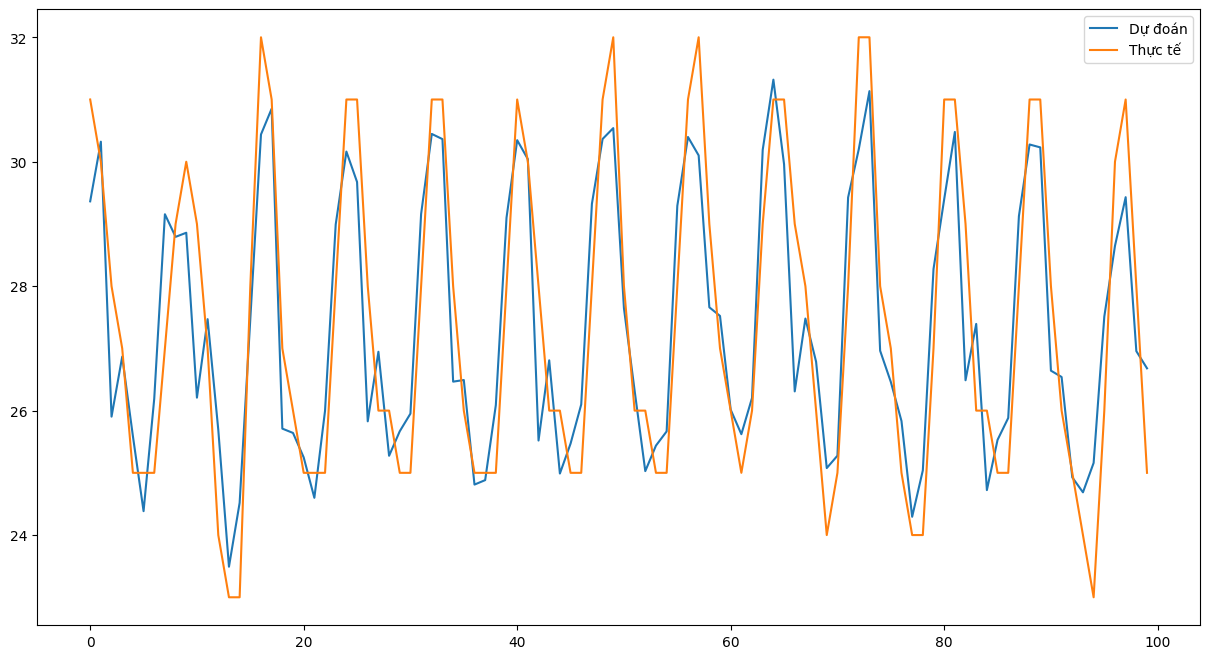

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(y_pred,label='Dự đoán')
plt.plot(df['Temp'][-100:].to_numpy(),label='Thực tế')
plt.legend()
plt.show()